In [1]:
#Imports

import math
import numpy as np 
from scipy import stats
from scipy.special import logit as lgTransform
from scipy.interpolate import UnivariateSpline
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pylab as plt 
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
import seaborn as sns
%matplotlib inline

In [2]:
dfSynonMu = pd.read_csv('syn_effects_plot.csv')
dfMissenseMu = pd.read_csv('mis_effects_plot.csv')

print(len(dfSynonMu))
print(len(dfMissenseMu))
print(dfSynonMu.head())
print(dfMissenseMu.head())

1620146
3877794
   chrom     pos             gene ref alt      freq  freq_nfe     mu  qual  \
0      1  925947  ENSG00000187634   C   A  0.000000  0.000000  0.020  high   
1      1  925947  ENSG00000187634   C   G  0.000000  0.000000  0.041  high   
2      1  925947  ENSG00000187634   C   T  0.000004  0.000009  0.139  high   
3      1  925950  ENSG00000187634   G   A  0.000004  0.000009  0.163  high   
4      1  925953  ENSG00000187634   G   A  0.000000  0.000000  0.261  high   

  context  ...  GIAB  CpG_context  logistic_freq    log_mu  log_mu_squared  \
0   TCCAA  ...     1          0.0              0 -1.698970        2.886499   
1   TCCAA  ...     1          0.0              0 -1.387216        1.924369   
2   TCCAA  ...     1          0.0              1 -0.856985        0.734424   
3   CCCTT  ...     1          0.0              1 -0.787812        0.620648   
4   ATCCC  ...     1          0.0              0 -0.583359        0.340308   

   GIAB_CpG_Interaction  probability_final_mod

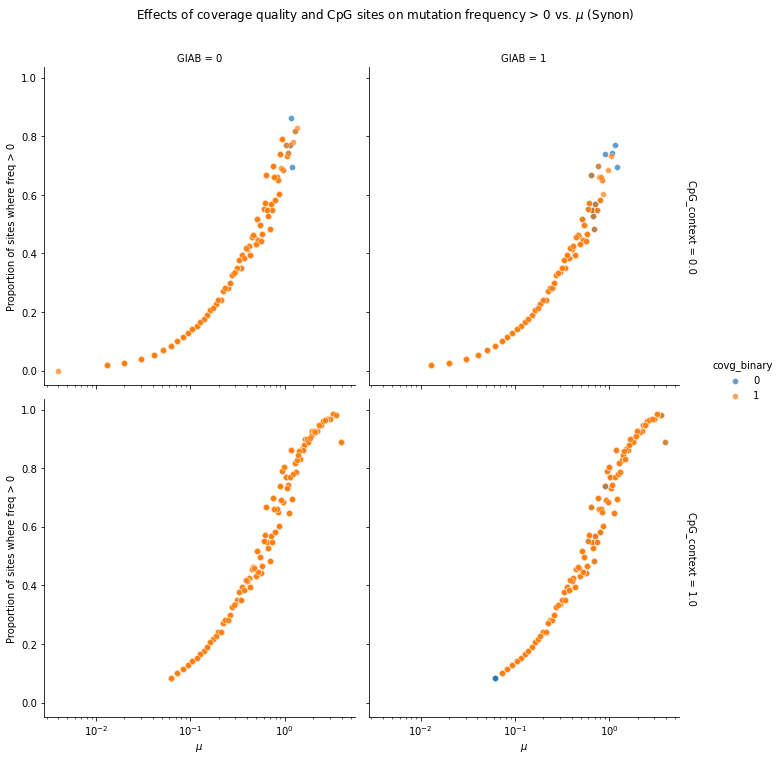

In [15]:
gSynon = sns.FacetGrid(dfSynonMu, row = "CpG_context", col="GIAB", hue = "covg_binary", height=5, margin_titles=True)
gSynon.set(xscale="log")
gSynon.map(sns.scatterplot, "mu", "prop_sites", alpha=.7)
#g.set(xlabel = "", ylabel = "")
#g.set_xlabel('',fontsize = 20)
#g.set_ylabel('',fontsize = 20 )
gSynon.set(xlabel='$\mu$', ylabel='Proportion of sites where freq > 0')
#title='Effects of coverage quality and CpG sites on mutation frequency > 0 vs. $\mu$'
gSynon.fig.suptitle('Effects of coverage quality and CpG sites on mutation frequency > 0 vs. $\mu$ (Synon)', y=1.05)
gSynon.add_legend()

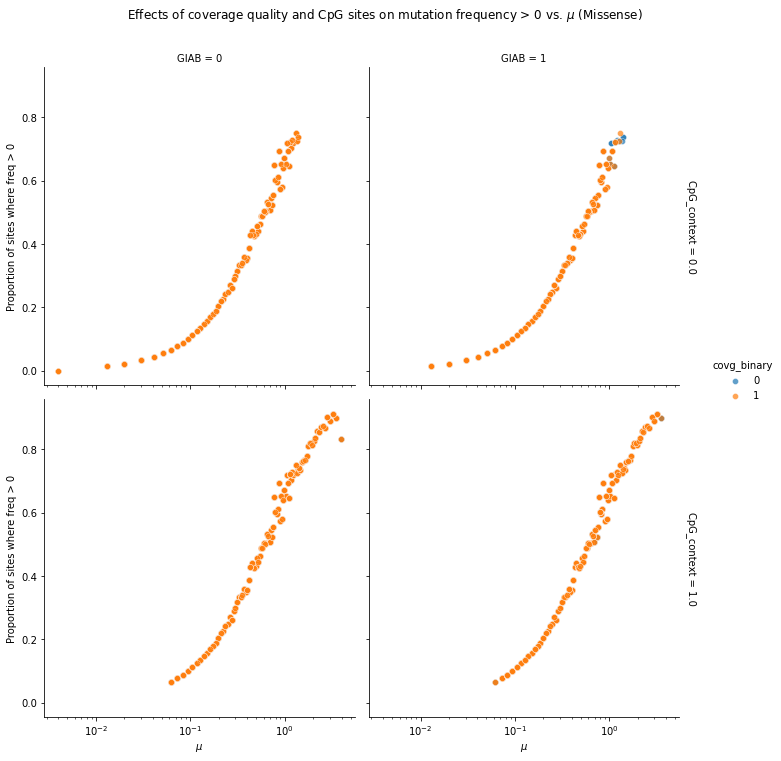

In [14]:
gMissense = sns.FacetGrid(dfMissenseMu, row = "CpG_context", col="GIAB", hue = "covg_binary", height=5, margin_titles=True)
gMissense.set(xscale="log")
gMissense.map(sns.scatterplot, "mu", "prop_sites", alpha=.7)
gMissense.set(xlabel='$\mu$', ylabel='Proportion of sites where freq > 0')
gMissense.fig.suptitle('Effects of coverage quality and CpG sites on mutation frequency > 0 vs. $\mu$ (Missense)', y=1.05)
gMissense.add_legend()